In [1]:
%pip install opencv-python numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

Note: using train dataset from here: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
test dataset using https://arxiv.org/abs/2307.02848

In [3]:
import os
import sys

module_path = os.path.abspath(".")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataset import *
from segmentation import *

In [4]:
x_normal, x_tb = get_dataset()
x_normal_test, x_tb_test = get_dataset_test()
# x_tb=x_tb[x_tb != None]

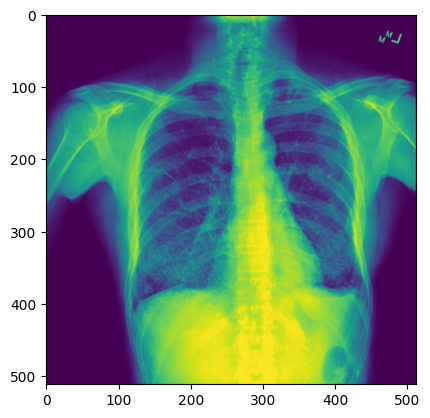

In [5]:
pyplot.imshow(x_normal[0])

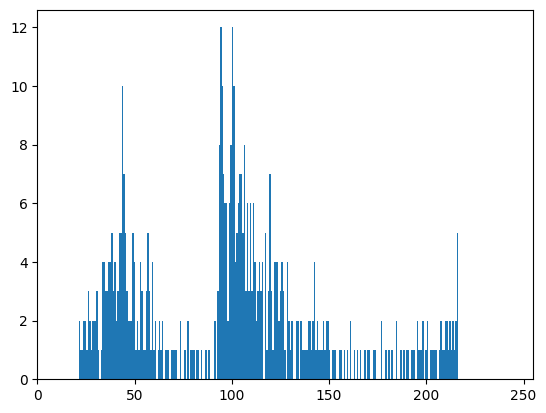

In [6]:
vals = x_normal[0].mean(axis=0).flatten()
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

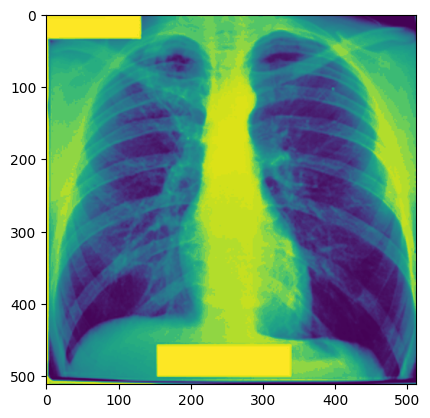

In [7]:
pyplot.imshow(x_tb[0])

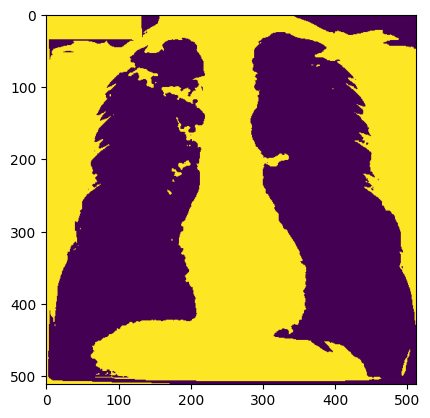

In [8]:
pyplot.imshow(get_segmentation(x_tb[0]))

In [9]:
np.array(x_tb).shape

(700, 512, 512)

In [10]:
x=[get_segmentation(x) for x in x_normal]
y=["normal"]*len(x_normal)
x=x+[get_segmentation(x) for x in x_tb]
y=y+["tb"]*len(x_tb)
dict = {
    "x": np.asarray(x),
    "y": np.asarray(y)
}

x_test=[get_segmentation(x_test) for x_test in x_normal_test]
y_test=["normal"]*len(x_normal_test)
x_test=x_test+[get_segmentation(x_test) for x_test in x_tb_test]
y_test=y_test+["tb"]*len(x_tb_test)
dict_test = {
    "x": np.asarray(x_test),
    "y": np.asarray(y_test)
}

In [11]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
import sklearn.ensemble as en

In [13]:
dict["x"].shape

(4200, 512, 512)

In [14]:
X_reshaped = dict["x"].reshape(dict["x"].shape[0], dict["x"].shape[1]*dict["x"].shape[2])
X_reshaped_test = dict_test["x"].reshape(dict_test["x"].shape[0], dict_test["x"].shape[1]*dict_test["x"].shape[2])

In [15]:
X_train, __, y_train, _ = train_test_split(X_reshaped, dict["y"] ,
                                   random_state=42, 
                                   test_size=0.01, 
                                   shuffle=True)

# _____, X_test, ___, y_test = train_test_split(X_reshaped_test, dict_test["y"] ,
#                                    random_state=42, 
#                                    test_size=0.9999, 
#                                    shuffle=True)

In [16]:
clf = RandomForestClassifier(max_depth=10, random_state=42, verbose=True)

In [17]:
clfsvc=SVC(random_state=42, max_iter=10)

In [18]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   19.9s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   39.4s finished


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
# clfsvc.fit(X_train, y_train)

In [20]:
result = clf.predict(X_reshaped_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [21]:
# result_svc = clfsvc.predict(X_reshaped_test)

In [22]:
trainres =clf.predict(X_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [23]:
accuracy_score(y_train, trainres)

0.987012987012987

In [24]:
accuracy_score(dict_test['y'], result)

0.8369565217391305

In [25]:
# accuracy_score(dict_test['y'], result_svc)